<a href="https://colab.research.google.com/github/ValeriaYashan/analisis_datos/blob/main/PREVISION_GASTOS_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

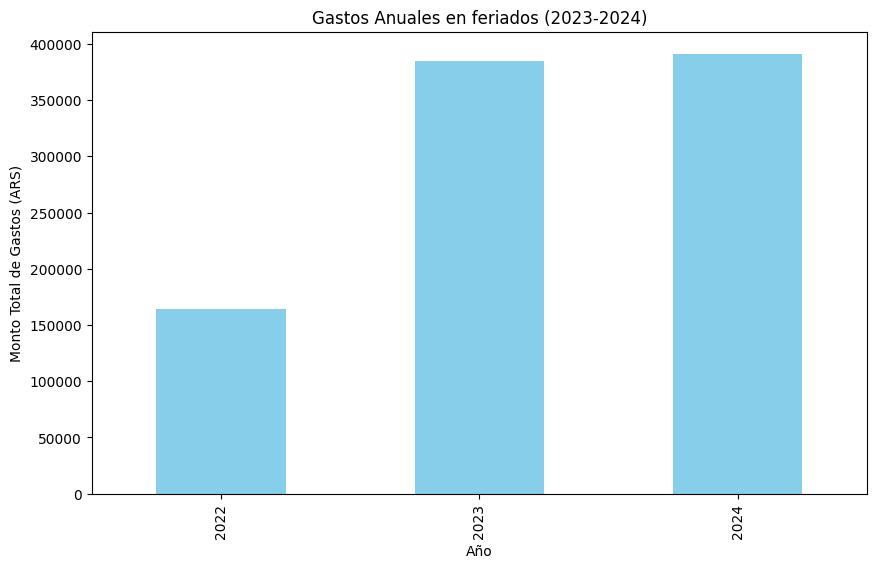

Gastos Anticipados para 2024:
Fecha: 2024-01-01, Gasto anticipado: $16605.51
Fecha: 2024-02-01, Gasto anticipado: $23411.40
Fecha: 2024-03-01, Gasto anticipado: $10232.39
Fecha: 2024-04-01, Gasto anticipado: $15894.36
Fecha: 2024-05-01, Gasto anticipado: $29268.70
Fecha: 2024-06-01, Gasto anticipado: $16422.99
Fecha: 2024-07-01, Gasto anticipado: $14186.75
Fecha: 2024-08-01, Gasto anticipado: $17980.83
Fecha: 2024-09-01, Gasto anticipado: $49152.95
Fecha: 2024-10-01, Gasto anticipado: $45531.40
Fecha: 2024-11-01, Gasto anticipado: $28785.74
Fecha: 2024-12-01, Gasto anticipado: $63834.58


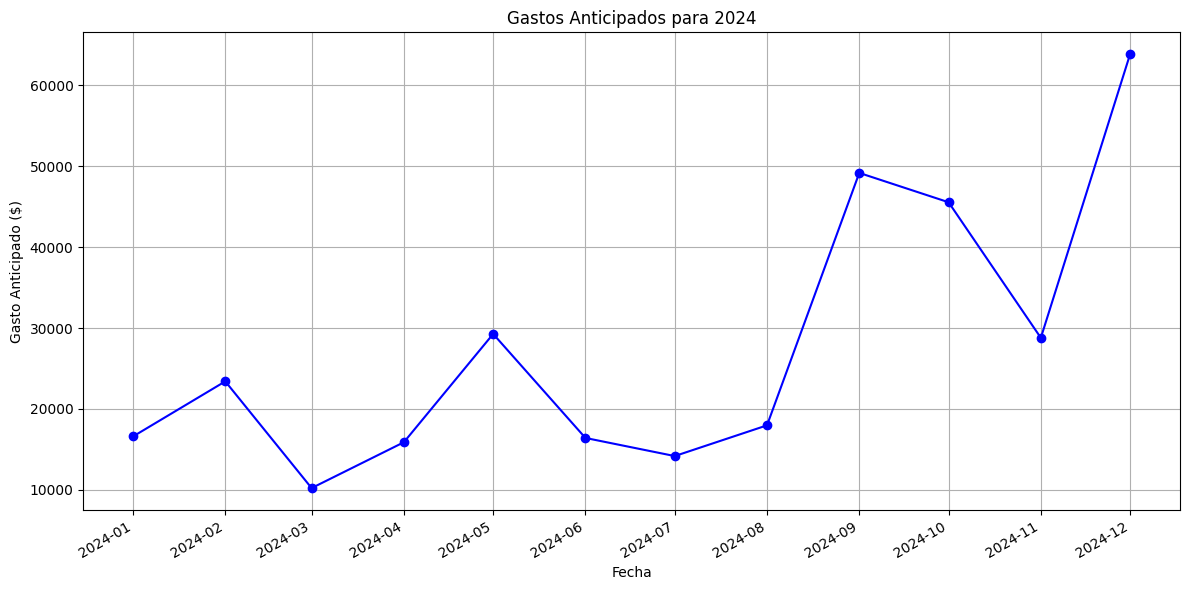

In [92]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import random

# Lista de fechas festivas para los años 2022 y 2023 en Argentina
fechas_festivas = [
    '2022-03-24',  # Día Nacional de la Memoria por la Verdad y la Justicia
    '2022-05-01',  # Día del Trabajador
    '2022-05-25',  # Día de la Revolución de Mayo
    '2022-06-20',  # Día de la Bandera
    '2022-07-09',  # Día de la Independencia
    '2022-08-17',  # Paso a la Inmortalidad del Gral. José de San Martín
    '2022-10-10',  # Día del Respeto a la Diversidad Cultural
    '2022-12-08',  # Inmaculada Concepción de María
    '2022-12-25',  # Navidad

    '2023-03-24',  # Día Nacional de la Memoria por la Verdad y la Justicia
    '2023-05-01',  # Día del Trabajador
    '2023-05-25',  # Día de la Revolución de Mayo
    '2023-06-20',  # Día de la Bandera
    '2023-07-09',  # Día de la Independencia
    '2023-08-17',  # Paso a la Inmortalidad del Gral. José de San Martín
    '2023-10-10',  # Día del Respeto a la Diversidad Cultural
    '2023-12-08',  # Inmaculada Concepción de María
    '2023-12-25',  # Navidad
]

# Conversión de las fechas festivas a formato datetime
fechas_festivas = pd.to_datetime(fechas_festivas)

# Datos ficticios de gastos en pesos argentinos para cada mes de los años 2022 y 2023
datos_historicos = {
    'fecha': pd.date_range(start='2022-01-01', periods=24, freq='MS'),
    'monto': [
        17450.50, 16200.75, 12700.80, 300.65, 15500.30, 7400.40, 13850.90, 15600.55, 14450.25,
        18700.60, 15300.95, 16500.20,  # 2022
        16470.45, 27210.50, 15680.70, 17320.35, 36510.85, 16410.95, 17870.15, 18610.40, 55470.55,
        64720.25, 18310.45, 80520.10   # 2023
    ]
}

# Tasa de inflación mensual estimada para 2024
tasas_inflacion_mensuales = [0.01, 0.015, 0.02, 0.012, 0.018, 0.022, 0.025, 0.02, 0.015, 0.01, 0.008, 0.02]

# Aplicar ajuste por inflación a los datos de 2023 para obtener los datos estimados para 2024
datos_ajustados_2024 = {
    'fecha': pd.date_range(start='2024-01-01', periods=12, freq='MS'),
    'monto': [monto * (1 + tasa) for monto, tasa in zip(datos_historicos['monto'][-12:], tasas_inflacion_mensuales)]
}

# Agregar los datos ajustados para 2024 al conjunto de datos original
datos_historicos['fecha'] = datos_historicos['fecha'].append(datos_ajustados_2024['fecha'])
datos_historicos['monto'] = datos_historicos['monto'] + datos_ajustados_2024['monto']

# Convertir a DataFrame de pandas
df_historico = pd.DataFrame(datos_historicos)

# Añadir columnas de tiempo como características
df_historico['mes'] = df_historico['fecha'].dt.month
df_historico['dia_semana'] = df_historico['fecha'].dt.dayofweek

# Marcar fechas festivas y fines de semana largos como 1, días no festivos como 0
df_historico['festivo'] = df_historico['fecha'].isin(fechas_festivas).astype(int)

# Preparar características y etiquetas para el modelo de machine learning
X = df_historico[['mes', 'dia_semana', 'festivo']]
y = df_historico['monto']

# Dividir los datos en un conjunto de entrenamiento y otro de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de Random Forest
modelo = RandomForestRegressor(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

# Calcular los gastos anuales entre 2023 y 2024
gastos_anuales = df_historico.groupby(df_historico['fecha'].dt.year)['monto'].sum()

# Mostrar los gastos anuales en un gráfico de barras
plt.figure(figsize=(10, 6))
gastos_anuales.plot(kind='bar', color='skyblue')
plt.title('Gastos Anuales en feriados (2023-2024)')
plt.xlabel('Año')
plt.ylabel('Monto Total de Gastos (ARS)')
plt.show()

# Crear un nuevo DataFrame para las fechas futuras de 2024, incluyendo la característica de festivos
fechas_futuras = pd.date_range(start='2024-01-01', periods=12, freq='MS')
festivos_2024 = [0]*12  # Asumimos inicialmente que no hay festivos; necesitarás actualizar esto con los festivos reales de 2024
X_future = pd.DataFrame({
    'mes': fechas_futuras.month,
    'dia_semana': fechas_futuras.dayofweek,
    'festivo': festivos_2024
})

# Predecir gastos para el año 2024
predicciones = modelo.predict(X_future)

# Mostrar las predicciones
print("Gastos Anticipados para 2024:")
for fecha, pred in zip(fechas_futuras, predicciones):
    print(f"Fecha: {fecha.date()}, Gasto anticipado: ${pred:.2f}")

# Crear el gráfico
plt.figure(figsize=(12, 6))
plt.plot(fechas_futuras, predicciones, marker='o', linestyle='-', color='blue')

# Formatear el gráfico
plt.title('Gastos Anticipados para 2024')
plt.xlabel('Fecha')
plt.ylabel('Gasto Anticipado ($)')

# Formatear las fechas en el eje x para mostrar solo año y mes
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# Rotar las fechas para mejor lectura
plt.gcf().autofmt_xdate()
plt.grid(True)
plt.tight_layout()
plt.show()